In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import pycytominer
import seaborn as sns
import matplotlib.pyplot as plt
import easygui as eg

import sys

sys.path.append(r"C:\Users\fefos\Documents\GitHub")
from scripts_notebooks_fossa.individual_feature_and_statistics import feat_stat

# 1. Inputs

In [2]:
# myfile = eg.fileopenbox(msg="Choose a file", default=r"E:")
myfile = r"C:\Users\fefos\OneDrive\FernandaDoc_HD\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2021_10_08_AgNPViability\2_FeatSelect_negconNonTrAndAgNP_pycombat.csv"
print('Filename', myfile)

Filename C:\Users\fefos\OneDrive\FernandaDoc_HD\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2021_10_08_AgNPViability\2_FeatSelect_negconNonTrAndAgNP_pycombat.csv


In [3]:
df = pd.read_csv(myfile)
df.head()

,Unnamed: 0,Metadata_plate_map_name,Metadata_Compound,Metadata_NPSize_nm,Metadata_Concentration_mgml,Metadata_Concentration_uM,Metadata_Cell,Metadata_control_type,Metadata_Plate,Metadata_Well,...,Nuclei_Texture_Correlation_CorrPI_20_01_256,Nuclei_Texture_Correlation_CorrPI_20_02_256,Nuclei_Texture_Correlation_CorrPI_20_03_256,Nuclei_Texture_Correlation_CorrPI_5_00_256,Nuclei_Texture_Correlation_CorrPI_5_01_256,Nuclei_Texture_DifferenceVariance_CorrGFP_20_03_256,Nuclei_Texture_Entropy_CorrGFP_10_01_256,Nuclei_Texture_Entropy_CorrGFP_20_02_256,Nuclei_Texture_Entropy_CorrPI_20_01_256,Nuclei_Texture_SumVariance_CorrGFP_20_03_256
0,0,platemap_agnp,DMSO,0.0,10.000000,10.0000,Huh7,NaN,211020_085918_Plate_1,B2,...,-3.040094,0.426281,-6.224937,0.289446,2.101180,0.200456,0.627755,0.430426,0.744437,2.539840
1,1,platemap_agnp,AgNP,40.0,0.000010,0.0011,Huh7,negcon,211020_085918_Plate_1,B3,...,0.869272,3.066179,-0.445715,0.446767,1.642236,-1.243979,1.826077,2.996182,2.609221,2.788302
2,2,platemap_agnp,AgNP,40.0,0.000020,0.0022,Huh7,NaN,211020_085918_Plate_1,B4,...,1.019367,1.997497,0.746693,0.264054,1.349547,-1.579239,2.273157,3.797980,3.264180,3.052398
3,3,platemap_agnp,AgNP,40.0,0.000039,0.0043,Huh7,NaN,211020_085918_Plate_1,B5,...,0.647957,3.605481,1.426029,1.156000,2.393404,-1.759080,2.593756,3.956161,3.335599,3.738272
4,4,platemap_agnp,AgNP,40.0,0.000078,0.0087,Huh7,NaN,211020_085918_Plate_1,B6,...,-0.405335,4.082781,0.301357,1.272607,2.796243,-1.876359,2.507920,3.833977,3.489078,2.735638


In [4]:
#Select which Metadata cols to join and paste into cols_to_join
#new_col is the col name we are using later
cols_to_join = ["Metadata_Compound", "Metadata_NPSize_nm", "Metadata_Concentration_uM"]

df, new_col = feat_stat.col_generator(df, cols_to_join = cols_to_join)

NPSize_nm
Concentration_uM
Names of the compounds + concentration:  ['DMSO 0.0 10.0' 'AgNP 40.0 0.0011' 'AgNP 40.0 0.0022' 'AgNP 40.0 0.0043'
 'AgNP 40.0 0.0087' 'AgNP 40.0 0.0174' 'AgNP 40.0 0.0347'
 'AgNP 40.0 0.0694' 'AgNP 40.0 0.1389' 'Non-treated 0.0 0.0'
 'AgNP 100.0 0.009' 'AgNP 100.0 0.017' 'AgNP 100.0 0.035'
 'AgNP 100.0 0.069' 'AgNP 100.0 0.139' 'AgNP 100.0 0.278'
 'AgNP 100.0 0.556' 'AgNP 100.0 1.111']


In [5]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14
BB = 18
BBB=20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BBB)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BBB)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BBB)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Load the font from file and set it as the default for text elements
plt.rcParams['font.sans-serif'] = ['Open Sans', 'Arial', 'sans-serif']
plt.rcParams['font.serif'] = ['Open Sans', 'Arial', 'sans-serif']
plt.rcParams['font.monospace'] = ['Open Sans', 'Arial', 'sans-serif']

color_bars = '#CFFFFF'

# Ag100

In [6]:
feats_to_plot=['Cytoplasm_AreaShape_Solidity',
 'Cytoplasm_Intensity_IntegratedIntensity_CorrPI',
 'Cytoplasm_Texture_Contrast_CorrPI_5_02_256',
 'Cytoplasm_Texture_Entropy_CorrPI_20_03_256',
 'Cytoplasm_Texture_Entropy_CorrPI_5_02_256',
 'Nuclei_AreaShape_SpatialMoment_1_3',
 'Nuclei_Granularity_6_CorrGFP',
 'Nuclei_Intensity_MassDisplacement_CorrGFP']

In [7]:
print('\033[1m' + 'Hello')

Hello


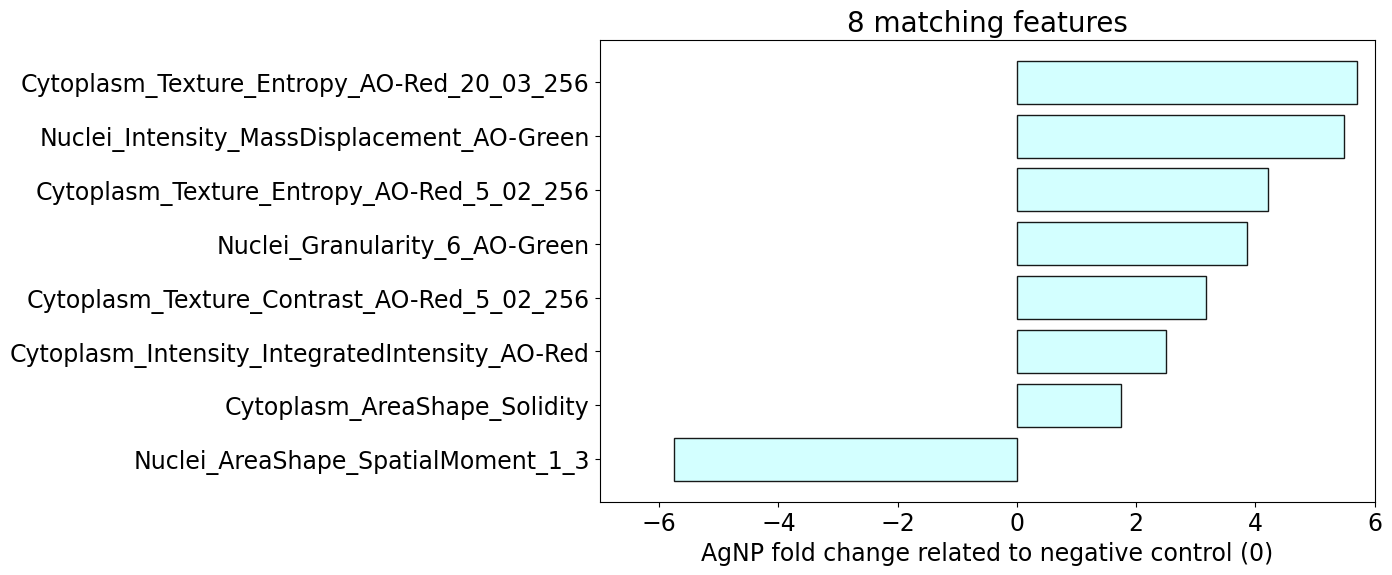

In [26]:
# Define a list of filters to select specific groups
list_filter = ['Non-treated 0.0 0.0', 'AgNP 100.0 0.556', 'AgNP 100.0 1.111']

# Extract metadata columns from the DataFrame
metadata = [x for x in df.columns if "Metadata" in x]

# Set parameters for the plot
left = -7
right = 6
trt = "AgNP"
negcon = "Non-treated"
groupby_col = "Metadata_Compound"
title = f"{len(feats_to_plot)} matching features"  # Add a more descriptive title

# Concatenate metadata columns and selected features for plotting
test = pd.concat([df[metadata], df[feats_to_plot]], axis="columns")

# Filter the DataFrame based on the specified list of filters
to_groupby = df.query(f'{new_col} in {list_filter}').reset_index(drop=True)

# Group by the specified column and calculate the median
gb = to_groupby.groupby([groupby_col]).median()

# Select the features to plot
to_plot = gb[feats_to_plot]

# Calculate the difference between treatment and negative control
y = to_plot.loc[trt] - to_plot.loc[negcon]

# Sort the values in ascending order for better visualization
y.sort_values(ascending=True, inplace=True)

# replace channels names
y.index = y.index.str.replace("CorrPI", "AO-Red").str.replace("CorrGFP", "AO-Green")

# Set the ggplot style
plt.style.use("default")
plt.figure(figsize=(10, 6))
plt.barh(y=y.index, width=y, edgecolor='black', linewidth=1, alpha=0.9, color=color_bars)
plt.xlabel('AgNP fold change related to negative control (0)', fontsize=17)
plt.title(title, fontsize=20)
plt.xlim(left, right)
plt.tick_params(axis='both', labelsize=17)
plt.savefig("Ag100.svg")
plt.show()

# Ag40

In [27]:
feats_to_plot=['Cells_RadialDistribution_RadialCV_CorrPI_1of4', 'Cells_Texture_AngularSecondMoment_CorrGFP_20_01_256', 'Cells_Texture_InfoMeas2_CorrGFP_10_00_256', 'Cells_Texture_InverseDifferenceMoment_CorrGFP_20_02_256', 
               'Cytoplasm_Intensity_IntegratedIntensity_CorrPI', 'Cytoplasm_Texture_AngularSecondMoment_CorrPI_20_03_256', 'Cytoplasm_Texture_Entropy_CorrPI_20_03_256', 'Cytoplasm_Texture_Entropy_CorrPI_5_02_256', 
               'Cytoplasm_Texture_InverseDifferenceMoment_CorrPI_5_02_256', 'Nuclei_Intensity_MassDisplacement_CorrGFP', 'Nuclei_Mean_Nucleoli_Intensity_MADIntensity_CorrGFP', 'Nuclei_Texture_Correlation_CorrPI_5_01_256']

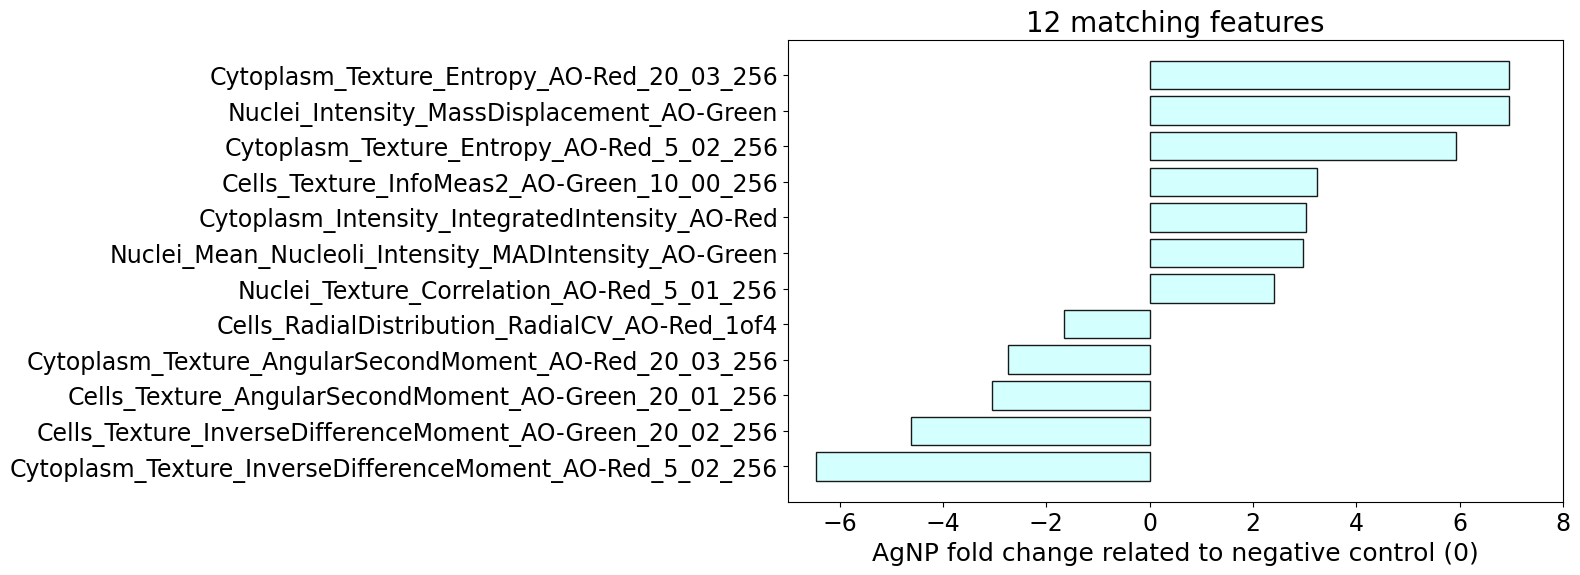

In [29]:
# Define a list of filters to select specific groups
list_filter=['Non-treated 0.0 0.0','AgNP 40.0 0.0694', 'AgNP 40.0 0.1389']

# Extract metadata columns from the DataFrame
metadata = [x for x in df.columns if "Metadata" in x]

# Set parameters for the plot
left = -7
right = 8
trt = "AgNP"
negcon = "Non-treated"
groupby_col = "Metadata_Compound"
title = f"{len(feats_to_plot)} matching features" 

# Concatenate metadata columns and selected features for plotting
test = pd.concat([df[metadata], df[feats_to_plot]], axis="columns")

# Filter the DataFrame based on the specified list of filters
to_groupby = df.query(f'{new_col} in {list_filter}').reset_index(drop=True)

# Group by the specified column and calculate the median
gb = to_groupby.groupby([groupby_col]).median()

# Select the features to plot
to_plot = gb[feats_to_plot]

# Calculate the difference between treatment and negative control
y = to_plot.loc[trt] - to_plot.loc[negcon]

# Sort the values in ascending order for better visualization
y.sort_values(ascending=True, inplace=True)

# replace channels names
y.index = y.index.str.replace("CorrPI", "AO-Red").str.replace("CorrGFP", "AO-Green")

# Set the ggplot style
plt.style.use("default")
plt.figure(figsize=(10, 6))
plt.barh(y=y.index, width=y, edgecolor='black', linewidth=1, alpha=0.9, color=color_bars)
plt.xlabel('AgNP fold change related to negative control (0)', fontsize=BB)
plt.title(title, fontsize=20)
plt.tick_params(axis='both', labelsize=17)
plt.xlim(left, right)
plt.savefig("Ag40.svg")
plt.show()